***Libraries import***

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the data**

In [2]:
df = pd.read_excel("/content/Bank_Churn.xlsx")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#get the data type of features and non-null numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
#no missing values
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [8]:
#no duplicated values
df.duplicated().sum()

np.int64(0)

In [9]:
#dependent variable Exited value counts
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


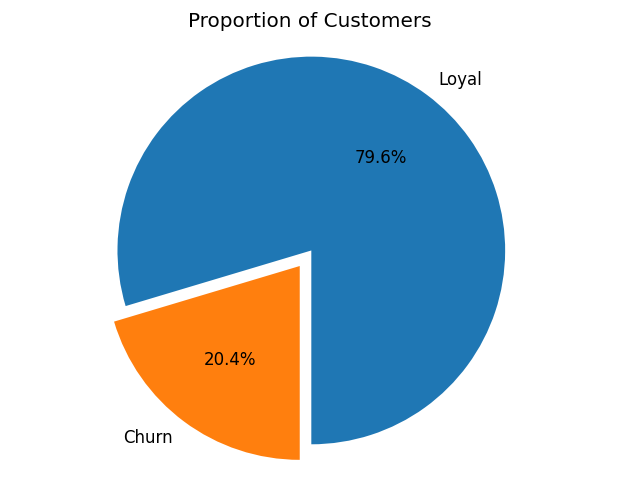

In [10]:
#dependent variable Exited value counts ploted in a pie chart
plt.figure(dpi=120)

explodeMeasure1 = [0, 0.1]

#Add shadows and rotate the plot
plt.pie(df["Exited"].value_counts(), labels= ["Loyal","Churn"],
        autopct='%0.1f%%',
        explode = explodeMeasure1,
        startangle = -90)
plt.title("Proportion of Customers")
plt.axis("equal")

plt.show()

In [11]:
print(f"There are {len(df[df.Exited==1])} churn and {len(df[df.Exited==0])} loyal customers in the data")

There are 2037 churn and 7963 loyal customers in the data


**Data is highly imbalanced. Predicting churn customers is important to us. As it is seen from pie chart, predicting all customers as Loyal gives approximately %80 accuracy**

In [12]:
features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

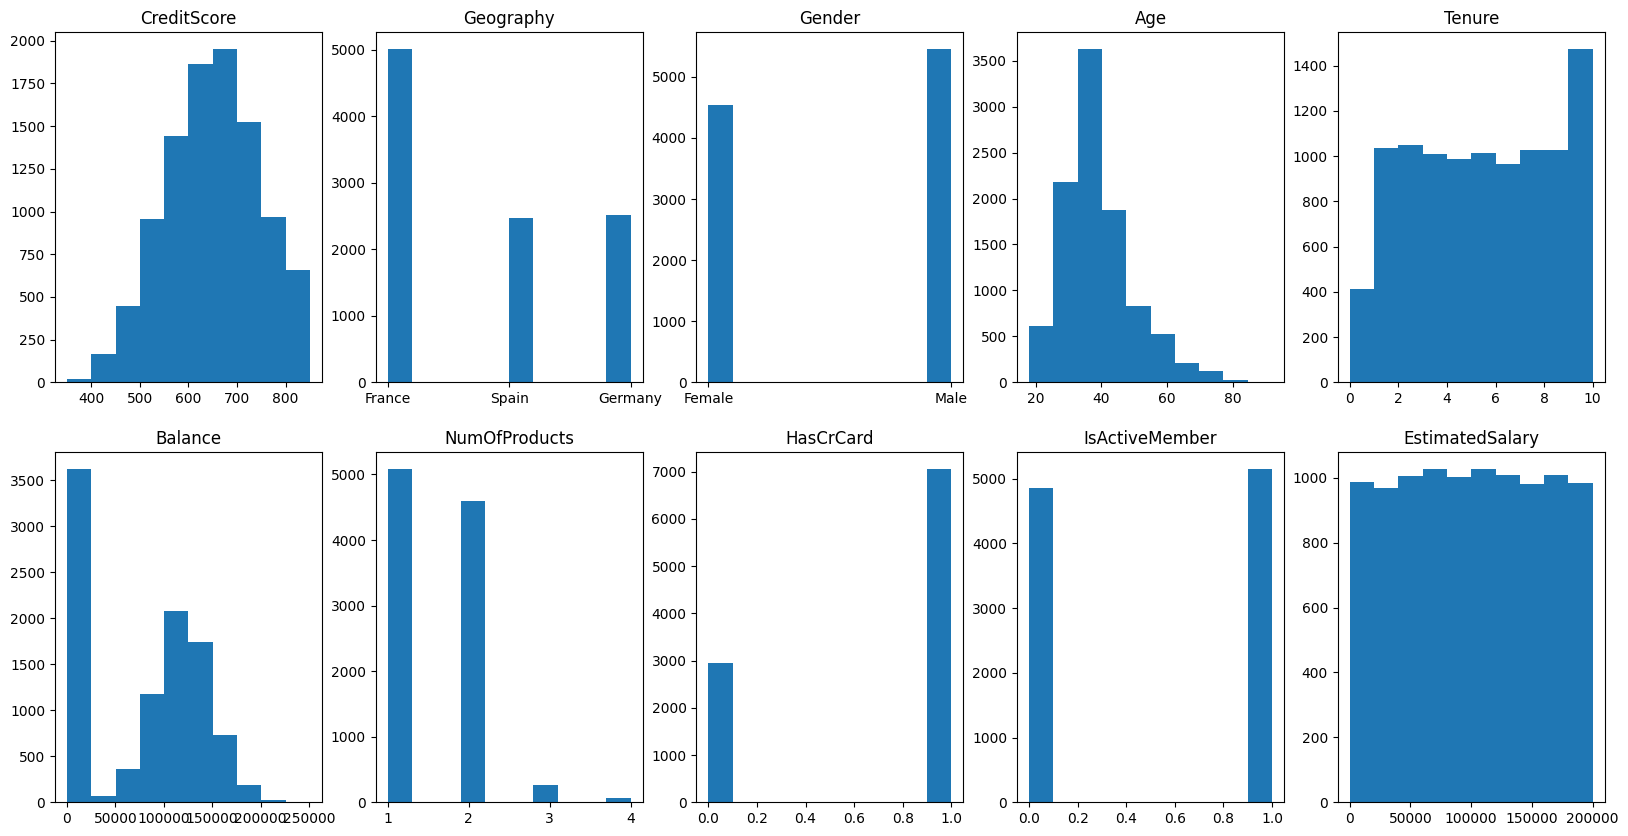

In [13]:
#plot feature histograms
fig, ax = plt.subplots(2,5,figsize=(20,10))
i=0;j=0
for c in features:
    ax[i,j].hist(df[c])
    ax[i,j].set_title(f"{c}")
    j = j+1;
    if j%5==0:
        i=i+1
        j=0

plt.show()

Age distribution is right-skewed, it seems there are a small number over-aged customer in data

Balance seems to be in normal distribution, if we drop 0 balanced customers. There are 3500 customers having 0 Balance on their accounts.

> With this Balance distribution,  a new flag feature can be created named HasBalance. HasBalance can have 0 or 1 depending on balance being greater than 0 or not. However, this method, decreased all of the model scores, so I didn't apply it.


/tmp/ipython-input-1096739877.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(score_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])


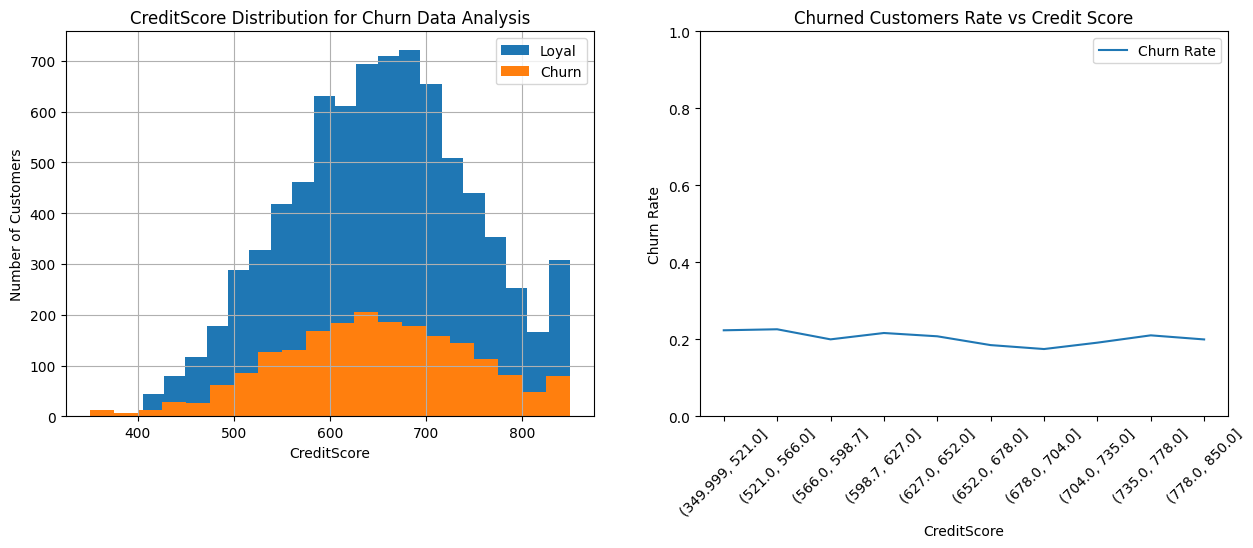

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histograms of Credit Score with respect to Exited values
ax[0,0].set_title("CreditScore Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'CreditScore'].hist(label='Loyal',bins=20,ax = ax[0,0])
df.loc[df['Exited']==1,'CreditScore'].hist(label='Churn',bins=20, ax = ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('CreditScore')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over credit score intervals
score_bins= pd.qcut(df['CreditScore'], 10)
df.groupby(score_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs Credit Score")
ax[0,1].legend(["Churn Rate"])
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].set_xticks(ticks=range(0,10),labels=score_bins.value_counts().index.sort_values(),rotation=45)
ax[0,1].set_ylim([0,1])

plt.show()

In [15]:
df.groupby(pd.qcut(df['CreditScore'], 10))["Exited"].agg(["count","mean","sum"])

/tmp/ipython-input-2911534354.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['CreditScore'], 10))["Exited"].agg(["count","mean","sum"])


,count,mean,sum
CreditScore,,,
"(349.999, 521.0]",1002,0.223553,224
"(521.0, 566.0]",1008,0.226190,228
"(566.0, 598.7]",990,0.200000,198
"(598.7, 627.0]",1030,0.216505,223
"(627.0, 652.0]",1005,0.207960,209
"(652.0, 678.0]",1005,0.185075,186
"(678.0, 704.0]",978,0.174847,171
"(704.0, 735.0]",1003,0.191426,192
"(735.0, 778.0]",998,0.210421,210


It can be seen that the churn distribution is quite similar to credit score distribution, it is seen from the line plots, the ups and downs of churn numbers are due to the magnitute of number of customers in that distribution. Churn rate is calculated as the number of churned customers divided by total number of customers. Credit Score is likely to have no effect on Churn.

> According to <a href= "https://www.investopedia.com/articles/personal-finance/081514/what-do-credit-score-ranges-mean.asp">investopedia</a>, Credit Scores, ranging between 0 and 850, can be divided into 5 segments as **Exceptional**, **Very Good**, **Good**, **Fair** and **Poor**, but when i convert credit score into these categories and apply macline learning algorithms, all scores are descreased. For this reason, I chose not to apply these conversion in final version.

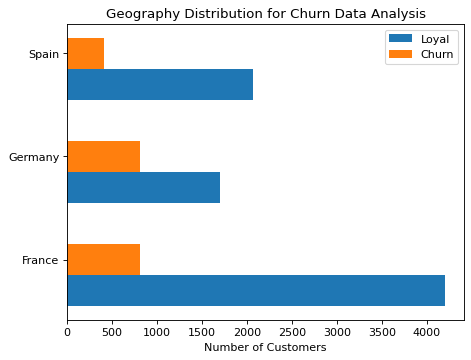

In [16]:
#plot histograms of Geography with respect to Exited values
plt.figure(dpi=80)
y = np.arange(3)
bin_height = 0.3
plt.title("Geography Distribution for Churn Data Analysis")
plt.barh(y,df.loc[df['Exited']==0,'Geography'].value_counts().sort_index(),height=bin_height,alpha=1,label="Loyal")
plt.barh(y+bin_height,df.loc[df['Exited']==1,'Geography'].value_counts().sort_index(),height=bin_height,alpha=1,label="Churn")
plt.xlabel("Number of Customers")
plt.yticks(y+bin_height, ["France","Germany","Spain"])
plt.legend()
plt.show()

In [17]:
country_churn = df.groupby("Geography")["Exited"].agg(["count","mean","sum"]).reset_index()

In [24]:
import folium
plt.style.use('fivethirtyeight')

In [27]:
import folium
from geopy.geocoders import Nominatim

# Geocoder
geolocator = Nominatim(user_agent="geoapi")

# Create base map (global view)
world_map = folium.Map(location=[20, 0], zoom_start=2)

# Function to pick color based on churn rate
def get_color(churn_rate):
    if churn_rate > 0.5:
        return 'red'     # High churn
    elif churn_rate > 0.2:
        return 'orange'  # Medium churn
    else:
        return 'green'   # Low churn

# Add circle markers for each country
for i in range(len(country_churn)):
    country = country_churn.iloc[i]['Geography']
    location = geolocator.geocode(country)
    if location:
        lat, long = location.latitude, location.longitude
        count = country_churn.iloc[i]['count']
        churn_rate = country_churn.iloc[i]['mean']

        popup_text = f"""
            <b>Country:</b> {country}<br>
            <b>Total Users:</b> {count}<br>
            <b>Churn Rate:</b> {churn_rate:.2f}
        """

        folium.CircleMarker(
            location=[lat, long],
            radius=count / 100,  # Bigger for more customers
            popup=folium.Popup(popup_text, max_width=300),
            fill=True,
            color=get_color(churn_rate),
            fill_color=get_color(churn_rate),
            fill_opacity=0.6
        ).add_to(world_map)

world_map



> Most of the Bank customers are located  in France.  Germany has 0.32 average churn rate, and 814 churned customers. Followed by Germany, France has the second most churned customer numbers. However, average number of churn is 0.16 in France. So, we can say in Germany, there can be a country specific problem (insufficient infrastructure,  customer services etc.) which might cause customers to exist the Bank

<Figure size 512x384 with 0 Axes>

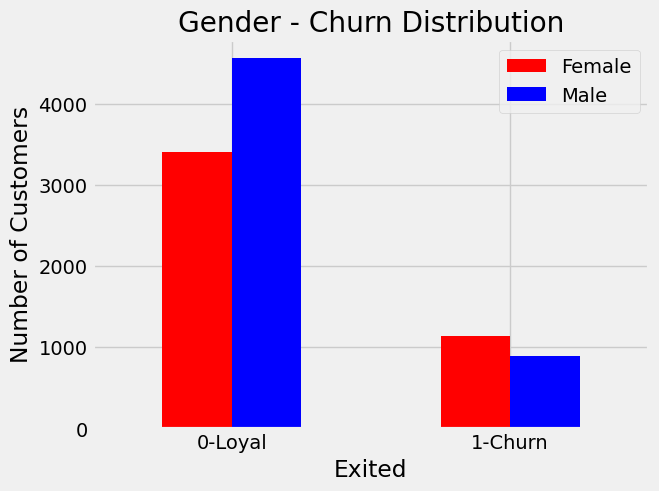

In [28]:
#plot the relationship between Gender and Exited
plt.figure(dpi=80)
pd.crosstab(df.Exited,df.Gender).plot(kind="bar",color=["r","b"])

plt.title("Gender - Churn Distribution")
plt.ylabel("Number of Customers")
plt.legend();
plt.xticks([0,1],["0-Loyal","1-Churn"],rotation=0)
plt.show()

In [29]:
df.groupby("Gender")["Exited"].agg(["count","mean","sum"])

,count,mean,sum
Gender,,,
Female,4543,0.250715,1139
Male,5457,0.164559,898


From this graph, we can say that, Male customers are more loyal than female customers. Female customer churn rates are higher.

/tmp/ipython-input-262006782.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(age_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])


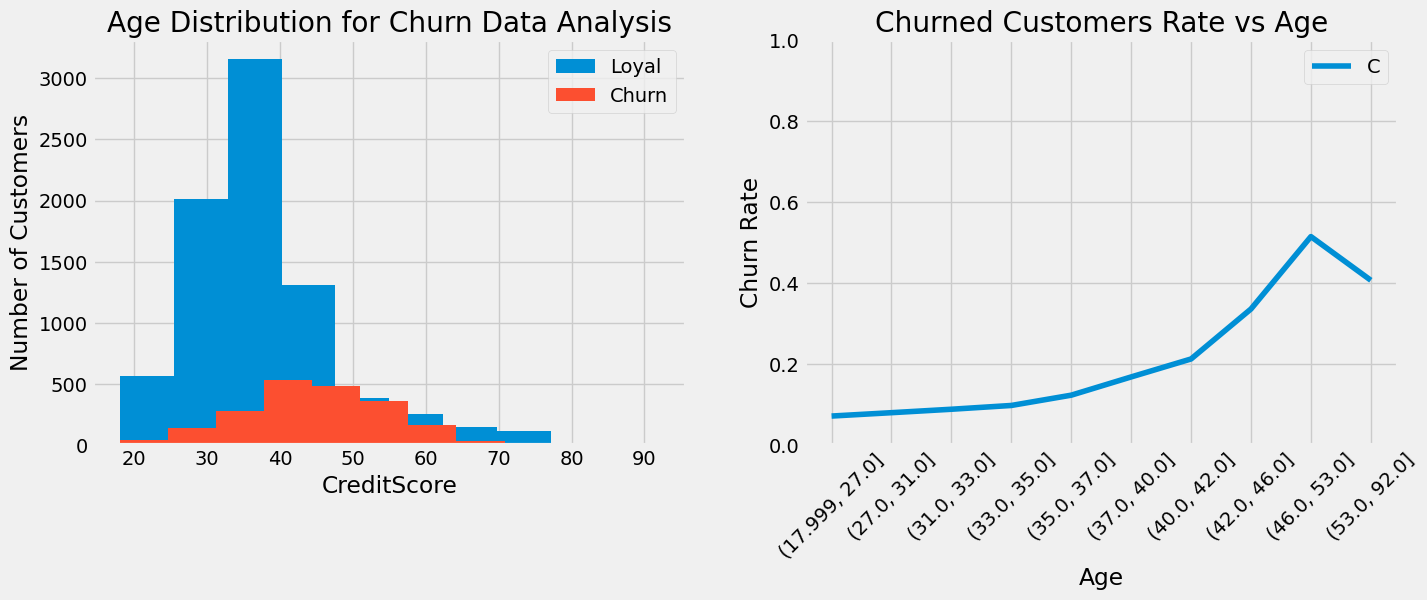

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histgram of age distributions of churn and loyal customers
ax[0,0].set_title("Age Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Age'].hist(label='Loyal', ax=ax[0,0])
df.loc[df['Exited']==1,'Age'].hist(label='Churn', ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('CreditScore')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over age intervals
age_bins = pd.qcut(df['Age'], 10)
df.groupby(age_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_ylim([0,1])
ax[0,1].set_title("Churned Customers Rate vs Age")
ax[0,1].set_xticks(ticks=range(0,10),labels=age_bins.value_counts().index.sort_values(),rotation=45)
ax[0,1].legend("Churn Rate")
ax[0,1].set_ylabel("Churn Rate")

plt.show()

In [31]:
df.groupby(pd.qcut(df['Age'], 10))["Exited"].agg(["count","mean","sum"])

/tmp/ipython-input-4213385150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['Age'], 10))["Exited"].agg(["count","mean","sum"])


,count,mean,sum
Age,,,
"(17.999, 27.0]",1020,0.071569,73
"(27.0, 31.0]",1352,0.079882,108
"(31.0, 33.0]",860,0.088372,76
"(33.0, 35.0]",921,0.097720,90
"(35.0, 37.0]",934,0.123126,115
"(37.0, 40.0]",1332,0.168168,224
"(40.0, 42.0]",687,0.212518,146
"(42.0, 46.0]",1009,0.335976,339
"(46.0, 53.0]",919,0.514690,473


Age values shown in 10 percentiles. With this arangement,  most of the customer ages fall between 27 and 31. Customers, whose ages are between 46 and 53 are more likey to churn. As it is seen from the churn rate plot, when the age goes up, churn rates also increases until 53.

Text(0, 0.5, 'Number of Customers')

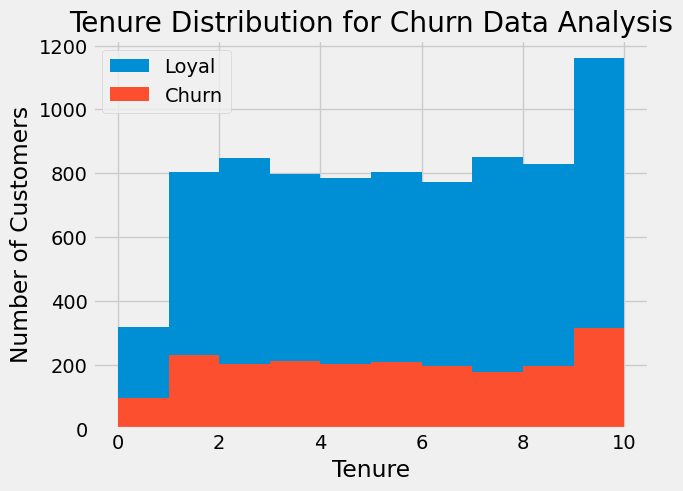

In [32]:
#plot histgram of tenure distributions of churn and loyal customers
plt.title("Tenure Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Tenure'].hist(label='Loyal',bins=10)
df.loc[df['Exited']==1,'Tenure'].hist(label='Churn',bins=10)
plt.legend();
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

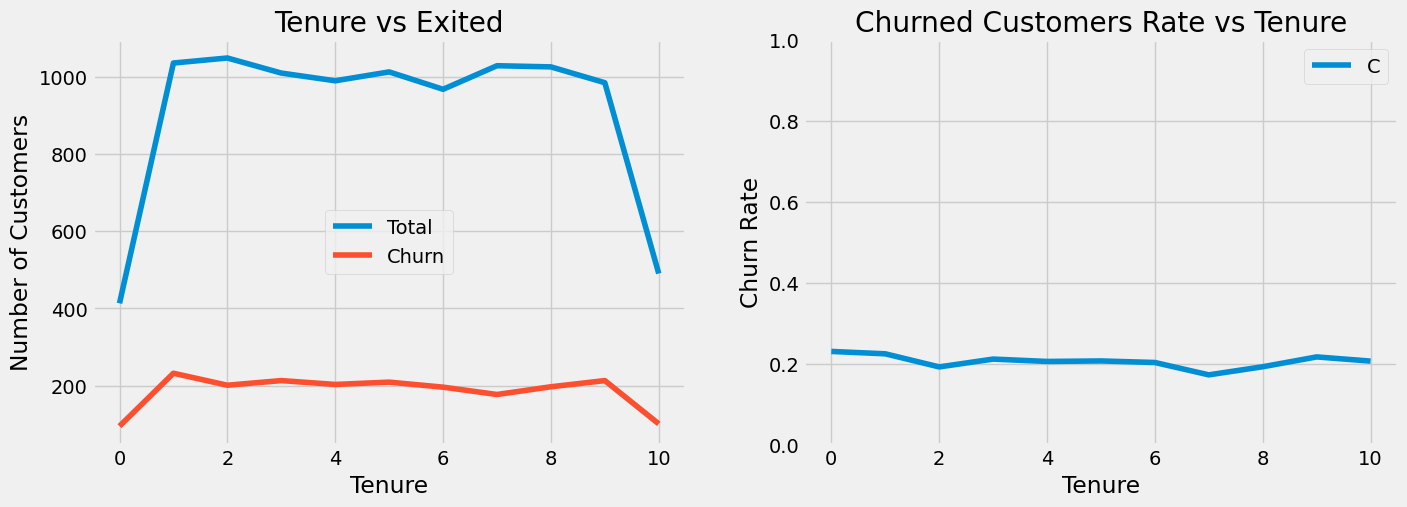

In [33]:

fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot number of churn and total customers over tenure
df.groupby(['Tenure'])["Exited"].agg(["count","sum"]).plot(ax=ax[0,0])
ax[0,0].legend(["Total","Churn"])
ax[0,0].set_title("Tenure vs Exited")
ax[0,0].set_ylabel("Number of Customers")

#plot churn rate over tenure
df.groupby(['Tenure'])["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_ylim([0,1])
ax[0,1].set_title("Churned Customers Rate vs Tenure")
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].legend("Churn Rate")

plt.show()

Tenure and churn distributions are quite similar. There is not a significant relation between Tenure and churn from this graph.


In [34]:
df.groupby(pd.cut(df['Balance'], 3))["Exited"].agg(["count","mean","sum"])

/tmp/ipython-input-2808279958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Balance'], 3))["Exited"].agg(["count","mean","sum"])


,count,mean,sum
Balance,,,
"(-250.898, 83632.697]",4353,0.151160,658
"(83632.697, 167265.393]",5262,0.242303,1275
"(167265.393, 250898.09]",385,0.270130,104


/tmp/ipython-input-4186809077.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(balance_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])


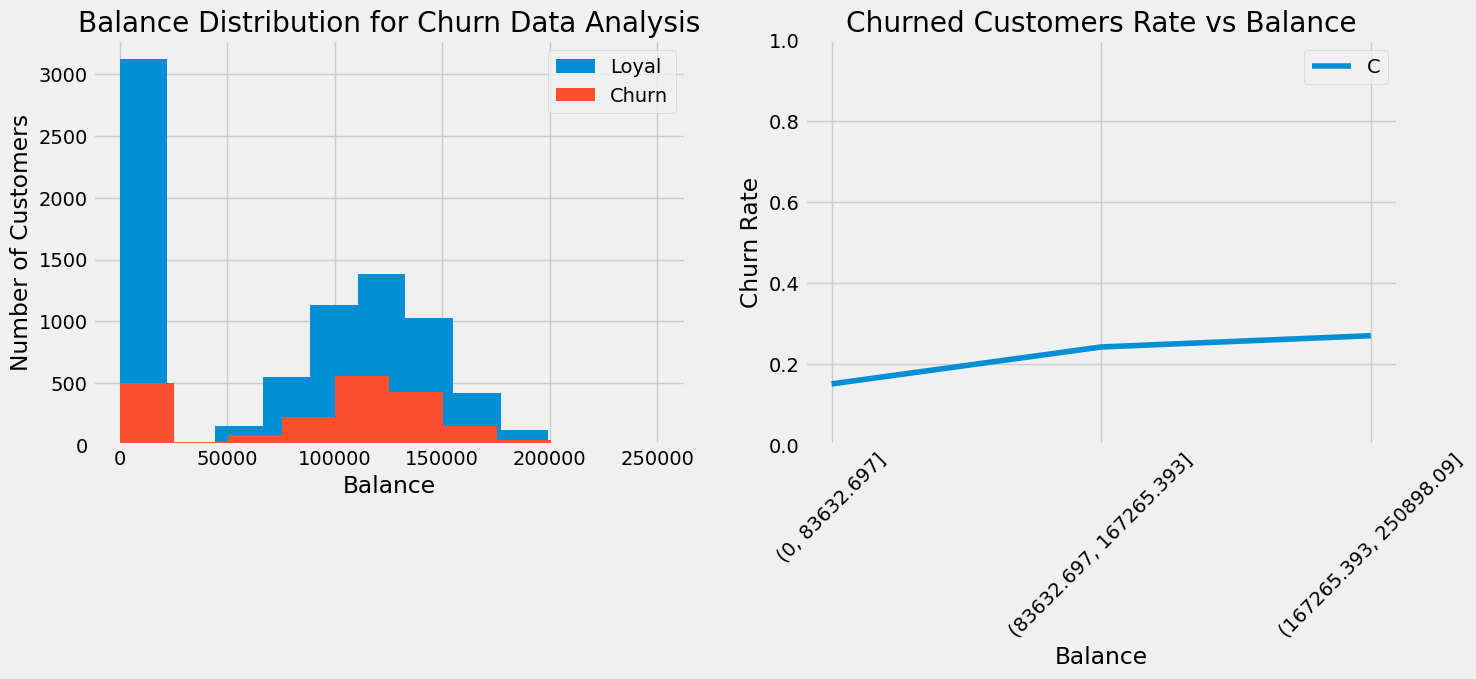

In [35]:
#plot histograms of Balance with respect to Exited values

fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

ax[0,0].set_title("Balance Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'Balance'].hist(label='Loyal',ax=ax[0,0])
df.loc[df['Exited']==1,'Balance'].hist(label='Churn',ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('Balance')
ax[0,0].set_ylabel('Number of Customers')

#plot churn rate over 3 balance intervals
balance_bins = pd.cut(df['Balance'], 3)
df.groupby(balance_bins)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs Balance")
ax[0,1].set_ylim([0,1])
ax[0,1].set_xticks(ticks=range(0,3),labels=["(0, 83632.697]","(83632.697, 167265.393]","(167265.393, 250898.09]"],rotation=45)
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].legend("Churn Rate")
plt.show()

In [36]:
df.groupby(pd.cut(df['Balance'], 10))["Exited"].agg(["count","mean","sum"])

/tmp/ipython-input-1181750592.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Balance'], 10))["Exited"].agg(["count","mean","sum"])


,count,mean,sum
Balance,,,
"(-250.898, 25089.809]",3623,0.139111,504
"(25089.809, 50179.618]",69,0.318841,22
"(50179.618, 75269.427]",360,0.222222,80
"(75269.427, 100359.236]",1173,0.192668,226
"(100359.236, 125449.045]",2081,0.268621,559
"(125449.045, 150538.854]",1747,0.244991,428
"(150538.854, 175628.663]",729,0.213992,156
"(175628.663, 200718.472]",186,0.231183,43
"(200718.472, 225808.281]",30,0.566667,17


In [37]:
print(f"{(df.query('Balance==0').shape[0]/df.shape[0])*100}% Customers have 0 Balance")

36.17% Customers have 0 Balance


Approximately 1/3 of customers have 0 balance, and most of them stay with the Bank. This is an alarming situation for the Bank.
If we exclude the customers with 0 balance, it is seen from the graph, balance and churn distribution are quite similar.

There is very few number of customers having Balance greater than 200.000 and among this customers most of them are churned. This can be interpreted as when balance increases then churn rate is also increase, bu this is not a correct interpretation. Since it is declared at the begining there is very few cutomers in that range. Churn rate plot line graph can be misinterpreted so i show the change of churn rate along with 3 balance intervals, but not 10.

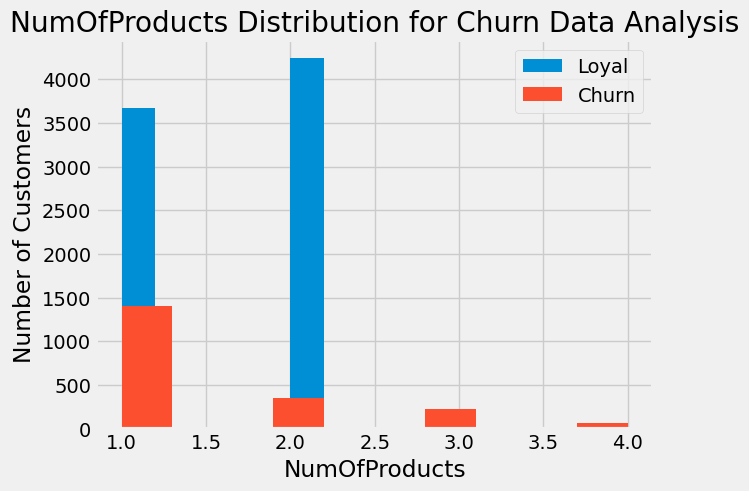

In [38]:
#plot histograms of NumOfProducts with respect to Exited values
plt.title("NumOfProducts Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'NumOfProducts'].hist(label='Loyal')
df.loc[df['Exited']==1,'NumOfProducts'].hist(label='Churn')
plt.legend();
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers')
plt.show()

In [39]:
df.groupby("NumOfProducts")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
NumOfProducts,,,
4,60,1.000000,60
3,266,0.827068,220
2,4590,0.075817,348
1,5084,0.277144,1409


Most of the customers have 2 products, then 1 products. Number of customers having 3 or 4 product is very low compared to 1 and 2.

Customers with only 1 product are more likely to churn.

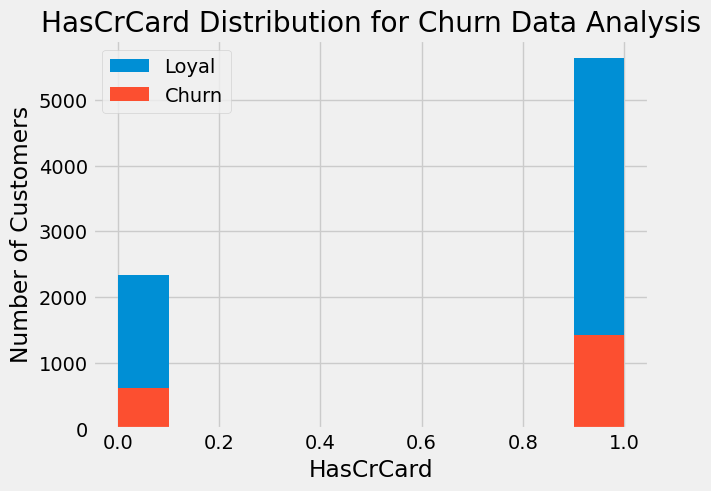

In [40]:
#plot histograms of HasCrCard with respect to Exited values
plt.title("HasCrCard Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'HasCrCard'].hist(label='Loyal')
df.loc[df['Exited']==1,'HasCrCard'].hist(label='Churn')
plt.legend();
plt.xlabel('HasCrCard')
plt.ylabel('Number of Customers')
plt.show()

In [41]:
df.groupby("HasCrCard")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
HasCrCard,,,
0,2945,0.208149,613
1,7055,0.201843,1424


Most of the customers have credit cards and for this reason, churn rates of customers with credit cards is slightly higher in the histograms.

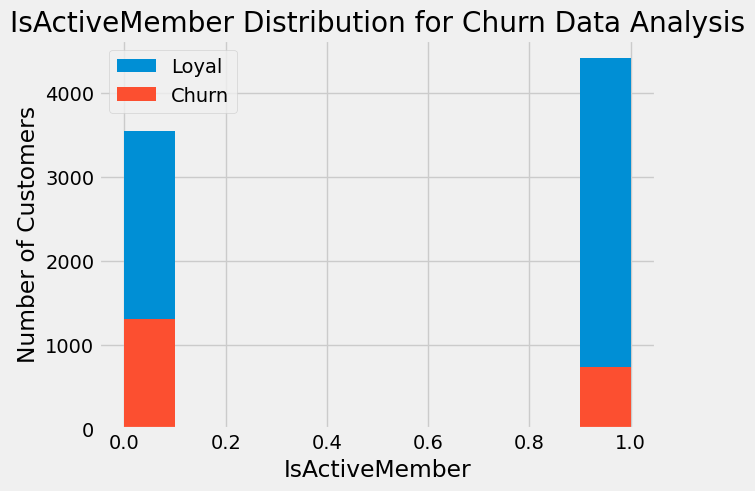

In [42]:
#plot histograms of IsActiveMember with respect to Exited values
plt.title("IsActiveMember Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'IsActiveMember'].hist(label='Loyal')
df.loc[df['Exited']==1,'IsActiveMember'].hist(label='Churn')
plt.legend();
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Customers')
plt.show()

In [43]:
df.groupby("IsActiveMember")["Exited"].agg(["count","mean","sum"]).sort_values(by="sum")

,count,mean,sum
IsActiveMember,,,
1,5151,0.142691,735
0,4849,0.268509,1302


As expected, active users are more loyal. (0.14<0.26).

/tmp/ipython-input-1704294741.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(salary_bin)["Exited"].agg(["mean"]).plot(ax=ax[0,1])


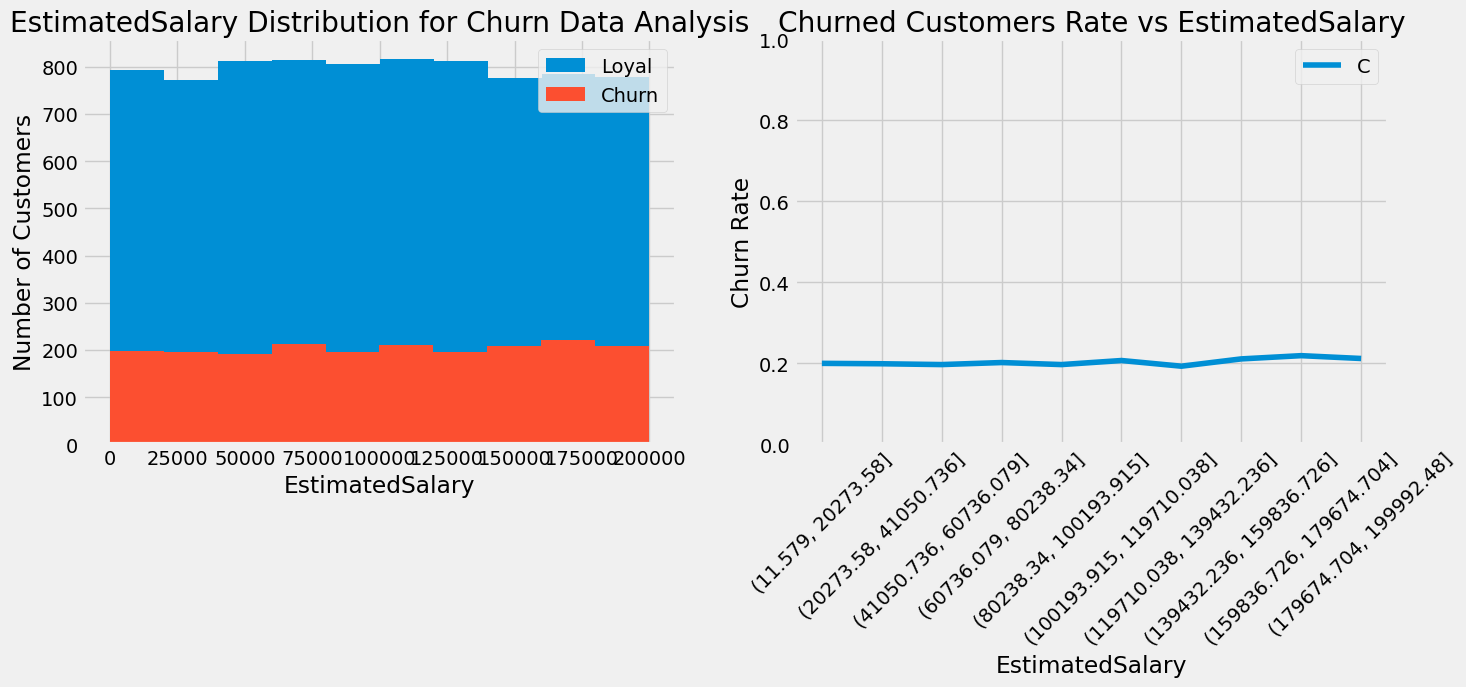

In [44]:
fig, ax = plt.subplots(1,2,figsize=(15,5),squeeze=False)

#plot histograms of EstimatedSalary with respect to Exited values
ax[0,0].set_title("EstimatedSalary Distribution for Churn Data Analysis")
df.loc[df['Exited']==0,'EstimatedSalary'].hist(label='Loyal',ax=ax[0,0])
df.loc[df['Exited']==1,'EstimatedSalary'].hist(label='Churn',ax=ax[0,0])
ax[0,0].legend();
ax[0,0].set_xlabel('EstimatedSalary')
ax[0,0].set_ylabel('Number of Customers')

salary_bin = pd.qcut(df['EstimatedSalary'], 10)

#plot churn rate over EstimatedSalary intervals
df.groupby(salary_bin)["Exited"].agg(["mean"]).plot(ax=ax[0,1])
ax[0,1].set_title("Churned Customers Rate vs EstimatedSalary")
ax[0,1].set_ylim([0,1])
ax[0,1].legend("Churn Rate")
ax[0,1].set_ylabel("Churn Rate")
ax[0,1].set_xticks(ticks=range(0,10),labels=salary_bin.value_counts().index.sort_values(),rotation=45)

plt.show()

In [45]:
df.groupby(pd.qcut(df['EstimatedSalary'], 10))["Exited"].agg(["mean","sum"])

/tmp/ipython-input-319367022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['EstimatedSalary'], 10))["Exited"].agg(["mean","sum"])


,mean,sum
EstimatedSalary,,
"(11.579, 20273.58]",0.200,200
"(20273.58, 41050.736]",0.199,199
"(41050.736, 60736.079]",0.197,197
"(60736.079, 80238.34]",0.202,202
"(80238.34, 100193.915]",0.197,197
"(100193.915, 119710.038]",0.207,207
"(119710.038, 139432.236]",0.193,193
"(139432.236, 159836.726]",0.211,211
"(159836.726, 179674.704]",0.219,219


Estimated salary distribution and churn distributions are quite similar. Also, as it is seen from the line plot, the churn rate does not change over estimated salary intervals. Estimated salary is not a clear evidence for churn and has not a effect on it according to the histogram and also the churn rate plot line graph.
